In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16,8)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.markersize'] = 10
#plt.style.use('presentation')
mpl.rc('font', **font)
import pandas as pd
data = pd.read_csv("collegePhysics.csv")
data = data.drop(["Total Contact Hours of Students Who Met With SI Leader During Office Hours"], axis = 1)
data.head(30)

,Year,Semester,SI N,"SI Combined A, B, C",SI combined D&F,W/I,GPA SI,# of SI Session Offered,Total Contact Hrs of Participating SI Students,Mean # of Sessions Attended,Mean Size of SIS,Mean SI Participant Evaluation of Helpfulness of SI Sessions (1=low to 5=high),Non-SI N,"Non-SI Combined A,B, C",Non-SI Combined D&F,W/I.1,GPA Non SI
0,2000,Spring,12,12,0,0,2.83,48.0,45,4,1,4.27,14,13,1,1,2.69
1,2003,Fall,14,14,0,0,3.07,41.0,152,11,4,4.14,27,14,13,7,2.40
2,2003,Spring,13,12,1,0,2.54,34.0,53,4,2,4.35,19,13,6,1,2.39
3,2004,Spring,12,9,3,0,2.17,37.0,56,5,2,3.40,19,15,4,1,2.11
4,2005,Fall,17,10,7,1,1.88,39.0,57,3,1,3.41,25,16,9,3,1.91
5,2005,Spring,14,14,0,0,3.07,41.0,152,11,4,4.14,27,14,13,7,2.40
6,2006,Fall,4,0,3,1,0.00,14.0,26,7,2,3.80,30,15,15,0,1.70
7,2006,Spring,8,8,0,0,2.75,34.0,20,3,1,3.85,15,13,2,0,2.27
8,2007,Fall,9,7,2,0,1.89,8.0,9,1,1,NaN,33,24,6,3,2.13
9,2007,Spring,1,1,0,0,2.00,33.0,1,1,0,NaN,20,16,4,0,2.35


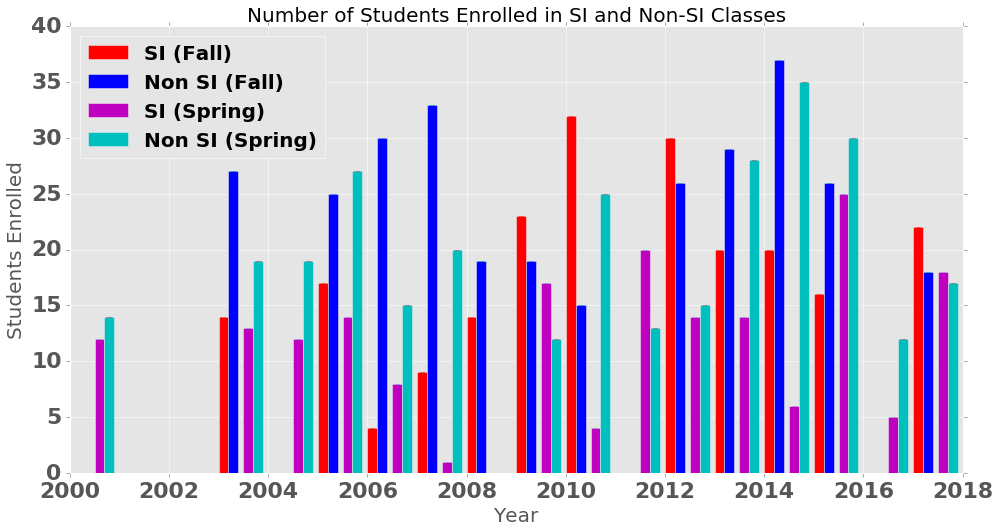

In [100]:
isFall = data['Semester'] == 'Fall'
isSpring = data['Semester'] == 'Spring' 

data_fall = data[isFall]
data_spring = data[isSpring]

n_si_fall = data_fall.iloc[:,2]
n_si_spring = data_spring.iloc[:,2]
n_nosi_fall = data_fall.iloc[:,12]
n_nosi_spring = data_spring.iloc[:,12]

width = 0.2

xsif = data_fall['Year']
xnonsif = xsif+0.2
xsis = data_spring['Year']+0.5
xnonsis= xsis+0.2


fig, ax = plt.subplots()

barsif = ax.bar(xsif, n_si_fall, width, color='r', yerr=0.0, label= "SI (Fall)")
barnonsif = ax.bar(xnonsif, n_nosi_fall, width, color='b', yerr=0.0 , label= "Non SI (Fall)")
barsis = ax.bar(xsis, n_si_spring, width, color='m', yerr=0.0, label= "SI (Spring)")
barnonsis = ax.bar(xnonsis, n_nosi_spring, width, color='c', yerr=0.0, label= "Non SI (Spring)")


ax.set_ylabel('Students Enrolled', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
ax.set_title("Number of Students Enrolled in SI and Non-SI Classes", fontsize=20)
ax.legend(loc='best', fontsize=20)
fig.show()
 

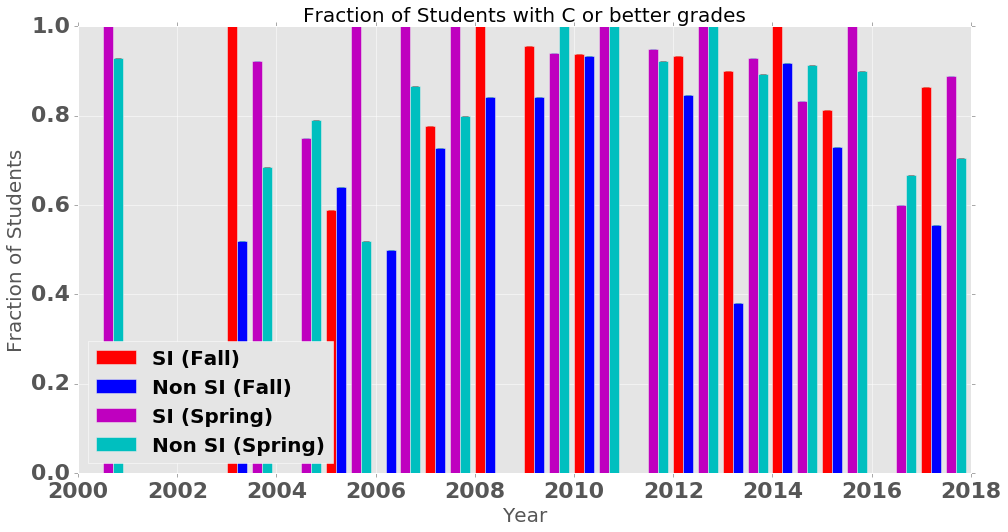

In [101]:
good_si_fall = data_fall.iloc[:,3]
good_si_spring = data_spring.iloc[:,3]
good_nosi_fall = data_fall.iloc[:,13]
good_nosi_spring = data_spring.iloc[:,13]


frac_good_si_fall = (good_si_fall/n_si_fall)
error_good_si_fall = np.sqrt(frac_good_si_fall * (1-frac_good_si_fall)/n_si_fall)
frac_good_si_spring = (good_si_spring/n_si_spring)
error_good_si_spring = np.sqrt(frac_good_si_spring * (1-frac_good_si_spring)/n_si_spring)
frac_good_nosi_fall = (good_nosi_fall/n_nosi_fall)
error_good_nosi_fall = np.sqrt(frac_good_nosi_fall * (1-frac_good_nosi_fall)/n_nosi_fall)
frac_good_nosi_spring = (good_nosi_spring/n_nosi_spring)
error_good_nosi_fall = np.sqrt(frac_good_nosi_spring * (1-frac_good_nosi_spring)/n_nosi_spring)
#print frac_good_si_fall, error_good_si_fall
fig, ax = plt.subplots()

barsif = ax.bar(xsif, frac_good_si_fall, width, color='r', yerr=0, label= "SI (Fall)")
barnonsif = ax.bar(xnonsif, frac_good_nosi_fall, width, color='b', yerr=0 , label= "Non SI (Fall)")
barsis = ax.bar(xsis, frac_good_si_spring, width, color='m', yerr=0, label= "SI (Spring)")
barnonsis = ax.bar(xnonsis, frac_good_nosi_spring, width, color='c', yerr=0, label= "Non SI (Spring)")

ax.set_ylabel('Fraction of Students', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
ax.set_title('Fraction of Students with C or better grades', fontsize=20)
ax.legend(loc='best', fontsize=20)
fig.show()
 

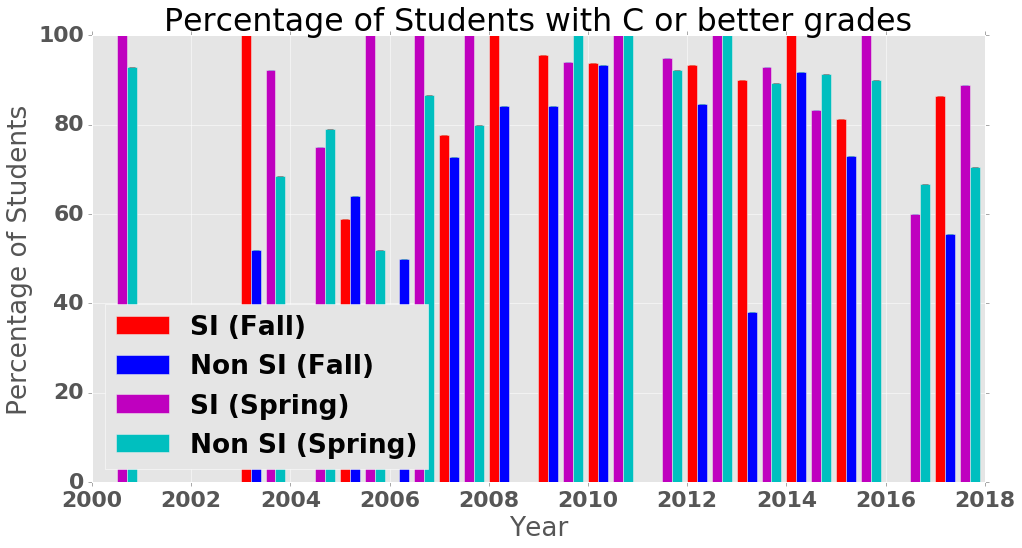

In [102]:
fig, ax = plt.subplots()
barsif = ax.bar(xsif, frac_good_si_fall*100, width, color='r', yerr=0.0, label= "SI (Fall)")
barnonsif = ax.bar(xnonsif, frac_good_nosi_fall*100, width, color='b', yerr=0.0 , label= "Non SI (Fall)")
barsis = ax.bar(xsis, frac_good_si_spring*100, width, color='m', yerr=0.0, label= "SI (Spring)")
barnonsis = ax.bar(xnonsis, frac_good_nosi_spring*100, width, color='c', yerr=0.0, label= "Non SI (Spring)")

ax.set_ylabel('Percentage of Students')
ax.set_xlabel('Year')
ax.set_title('Percentage of Students with C or better grades')
ax.legend(loc='best')
fig.show()

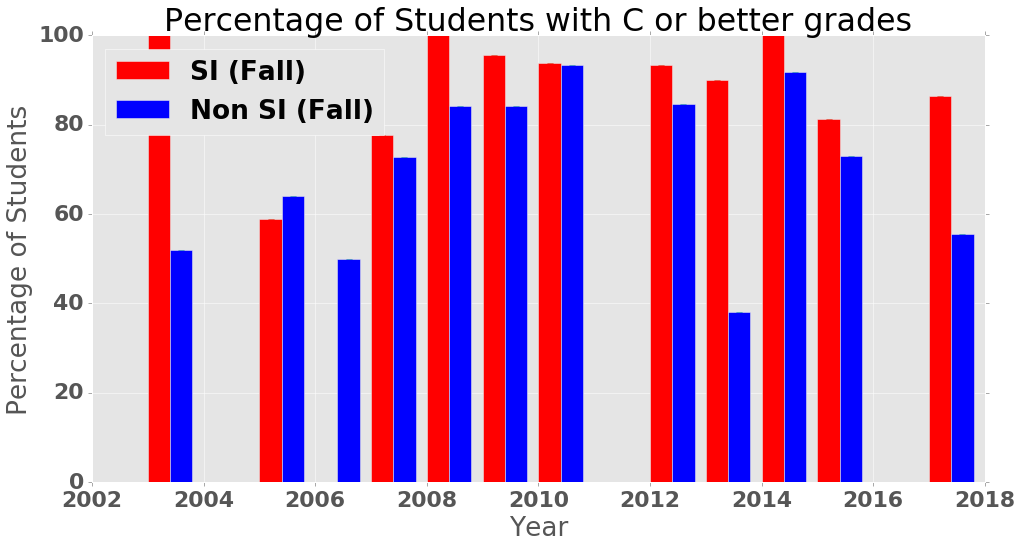

In [103]:
fig, ax = plt.subplots()
barsif = ax.bar(xsif, frac_good_si_fall*100, width*2, color='r', yerr=0.0, label= "SI (Fall)")
barnonsif = ax.bar(xnonsif+0.2, frac_good_nosi_fall*100, width*2, color='b', yerr=0.0 , label= "Non SI (Fall)")
#barsis = ax.bar(xsis, frac_good_si_spring*100, width, color='m', yerr=0.0, label= "SI (Spring)")
#barnonsis = ax.bar(xnonsis, frac_good_nosi_spring*100, width, color='c', yerr=0.0, label= "Non SI (Spring)")

ax.set_ylabel('Percentage of Students')
ax.set_xlabel('Year')
ax.set_title('Percentage of Students with C or better grades')
ax.legend(loc='best')
fig.show()

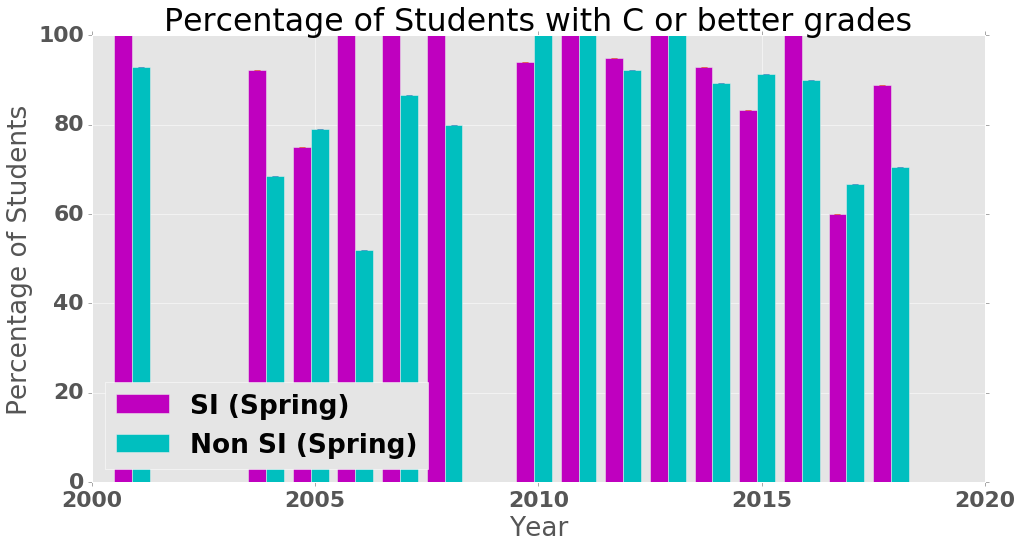

In [104]:
fig, ax = plt.subplots()
#barsif = ax.bar(xsif, frac_good_si_fall*100, width, color='r', yerr=0.0, label= "SI (Fall)")
#barnonsif = ax.bar(xnonsif, frac_good_nosi_fall*100, width, color='b', yerr=0.0 , label= "Non SI (Fall)")
barsis = ax.bar(xsis, frac_good_si_spring*100, width*2, color='m', yerr=0.0, label= "SI (Spring)")
barnonsis = ax.bar(xnonsis+0.2, frac_good_nosi_spring*100, width*2, color='c', yerr=0.0, label= "Non SI (Spring)")

ax.set_ylabel('Percentage of Students')
ax.set_xlabel('Year')
ax.set_title('Percentage of Students with C or better grades')
ax.legend(loc='best')
fig.show()

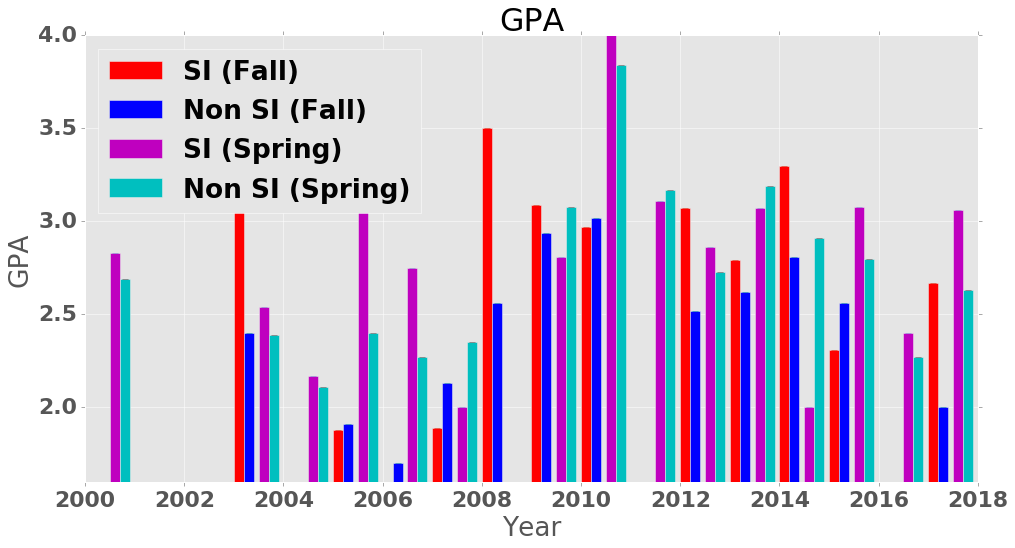

In [105]:
gpa_si_fall = data_fall["GPA SI"]
gpa_nosi_fall = data_fall["GPA Non SI"]
gpa_si_spring = data_spring["GPA SI"]
gpa_nosi_spring = data_spring["GPA Non SI"]

plt.bar(xsif, gpa_si_fall, width, color='r', yerr=0.0, label= "SI (Fall)")
plt.bar(xnonsif, gpa_nosi_fall, width, color='b', yerr=0.0, label= "Non SI (Fall)")
plt.bar(xsis, gpa_si_spring, width, color='m', yerr=0.0, label= "SI (Spring)")
plt.bar(xnonsis, gpa_nosi_spring, width, color='c', yerr=0.0, label= "Non SI (Spring)")


plt.legend(loc="best")
plt.title("GPA")
plt.ylabel('GPA')
plt.xlabel('Year')
plt.ylim(1.6, 4.0)
plt.show()

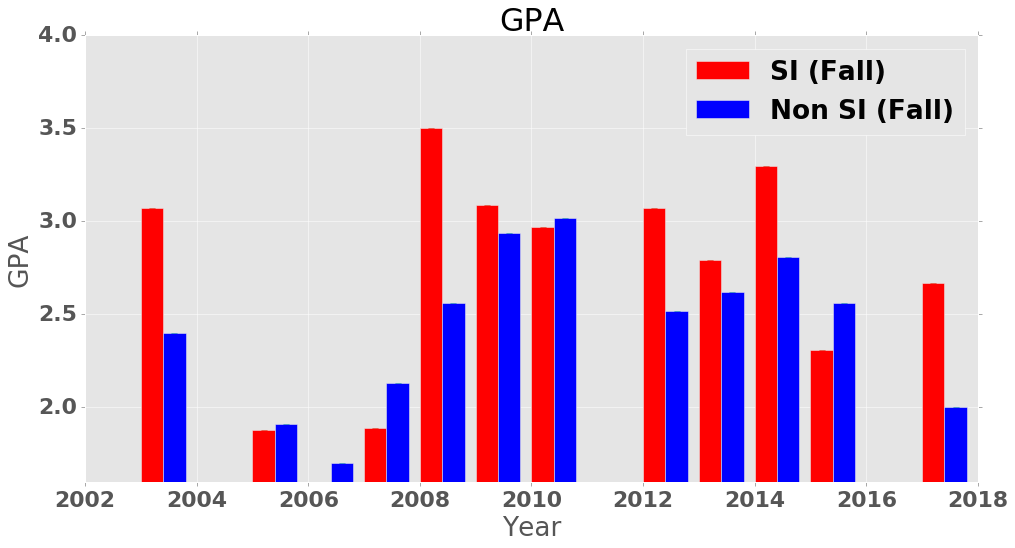

In [106]:
plt.bar(xsif, gpa_si_fall, width*2, color='r', yerr=0.0, label= "SI (Fall)")
plt.bar(xnonsif+0.2, gpa_nosi_fall, width*2, color='b', yerr=0.0, label= "Non SI (Fall)")
#plt.bar(xsis, gpa_si_spring, width, color='m', yerr=0.0, label= "SI (Spring)")
#plt.bar(xnonsis, gpa_nosi_spring, width, color='c', yerr=0.0, label= "Non SI (Spring)")


plt.legend(loc="best")
plt.title("GPA")
plt.ylabel('GPA')
plt.xlabel('Year')
plt.ylim(1.6, 4.0)
plt.show()

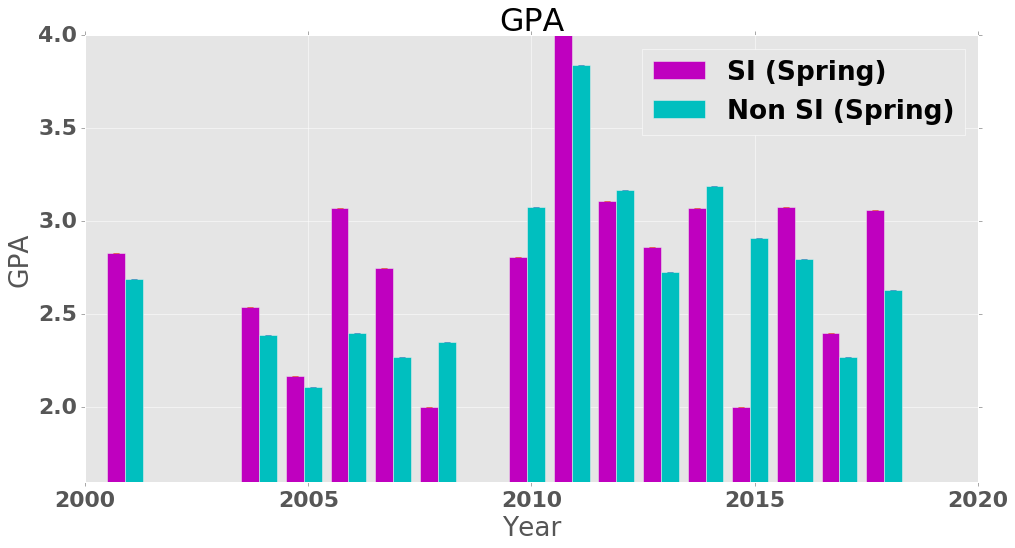

In [107]:
#plt.bar(xsif, gpa_si_fall, width, color='r', yerr=0.0, label= "SI (Fall)")
#plt.bar(xnonsif, gpa_nosi_fall, width, color='b', yerr=0.0, label= "Non SI (Fall)")
plt.bar(xsis, gpa_si_spring, width*2, color='m', yerr=0.0, label= "SI (Spring)")
plt.bar(xnonsis+0.2, gpa_nosi_spring, width*2, color='c', yerr=0.0, label= "Non SI (Spring)")


plt.legend(loc="best")
plt.title("GPA")
plt.ylabel('GPA')
plt.xlabel('Year')
plt.ylim(1.6, 4.0)
plt.show()

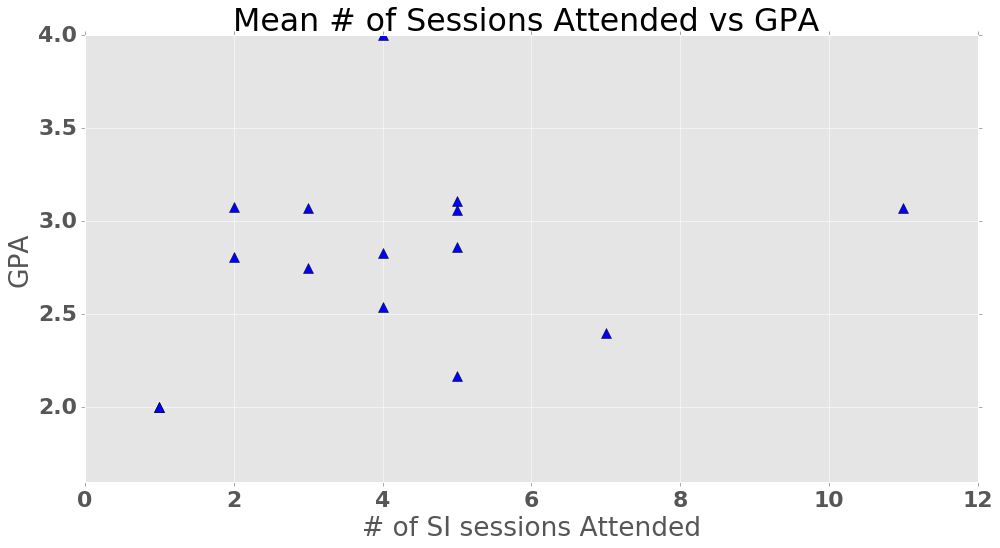

In [108]:
#Class size vs GPA SI vs Non SI
meanSS_si_fall = data_fall.iloc[:,9]
meanSS_si_spring = data_spring.iloc[:,9]

#gpa_si.hist()
plt.plot(meanSS_si_fall, frac_good_si_fall, "*r", label="Fall")
plt.plot(meanSS_si_spring, gpa_si_spring, "^b", label="Spring")

plt.xlabel("# of SI sessions Attended")
plt.ylabel("GPA")
plt.title("Mean # of Sessions Attended vs GPA ")
#plt.legend('best')
plt.ylim(1.6, 4.0)
plt.show()


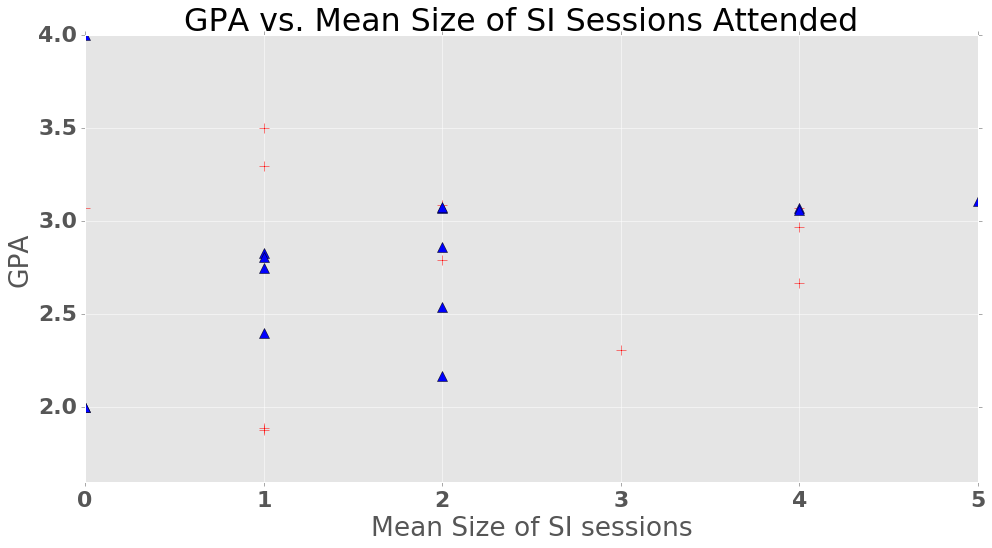

In [109]:
meanSISize_fall= data_fall.iloc[:,10]
meanSISize_spring = data_spring.iloc[:,10]
plt.plot(meanSISize_fall, gpa_si_fall, "+r", label="Fall")
plt.plot(meanSISize_spring, gpa_si_spring, "^b", label="Spring")
plt.xlabel("Mean Size of SI sessions")
plt.ylabel("GPA")
plt.title("GPA vs. Mean Size of SI Sessions Attended  ")
#plt.legend('best')
plt.ylim(1.6, 4.0)
plt.show()



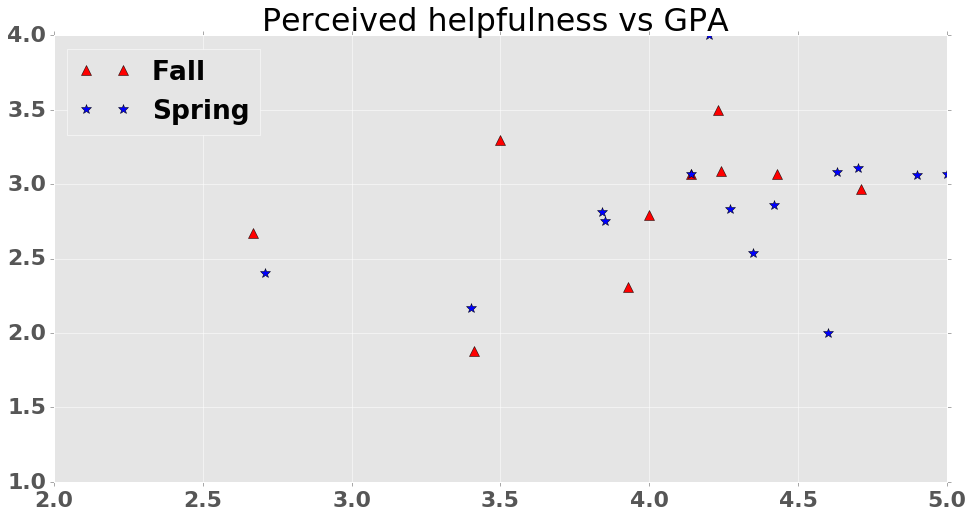

In [110]:
#Perceived helpfulness vs letter grade OR GPA
perceived_helpfulness = data_fall.iloc[:,11]
plt.plot(perceived_helpfulness, gpa_si_fall, "^r", label="Fall")
perceived_helpfulness_spring = data_spring.iloc[:,11]
plt.plot(perceived_helpfulness_spring, gpa_si_spring, "*b", label="Spring")



plt.legend(loc="best")
plt.title("Perceived helpfulness vs GPA ")
plt.ylim(1,4)
plt.xlim(2, 5)
plt.show()

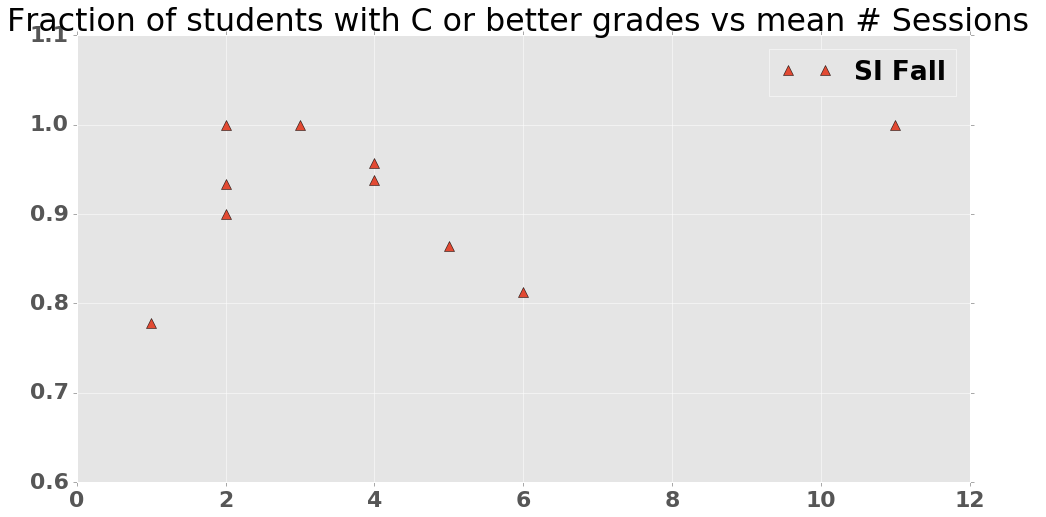

In [111]:
plt.plot(meanSS_si_fall, frac_good_si_fall,"^", label="SI Fall")
#plt.bar(meanSS_si_spring, frac_good_si_spring, label="SI Spring")
plt.legend(loc="best")
plt.title("Fraction of students with C or better grades vs mean # Sessions ")
plt.ylim(0.6, 1.1)
plt.show()



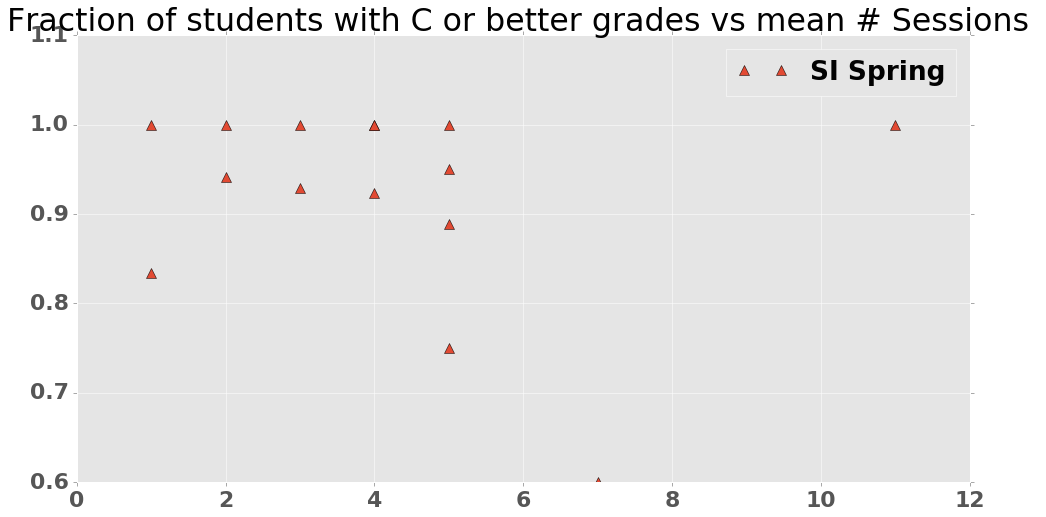

In [112]:
#plt.bar(meanSS_si_fall, frac_good_si_fall, label="SI Fall")
plt.plot(meanSS_si_spring, frac_good_si_spring, "^", label="SI Spring")
plt.legend(loc="best")
plt.title("Fraction of students with C or better grades vs mean # Sessions ")
plt.ylim(0.6, 1.1)
plt.show()



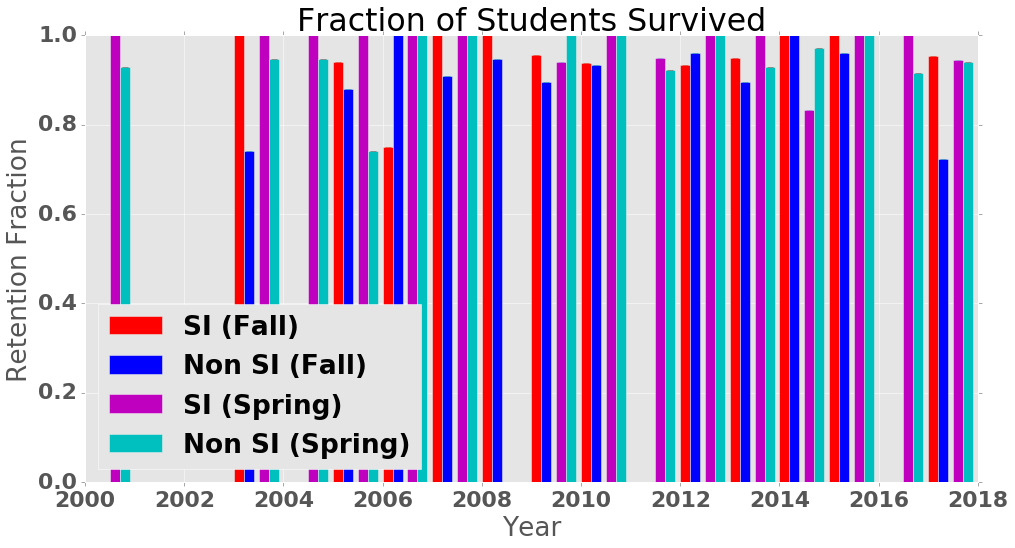

In [113]:
survival_frac_si_fall = (n_si_fall- data_fall.iloc[:,5])/n_si_fall
survival_frac_nosi_fall = (n_nosi_fall-data_fall.iloc[:,15])/n_nosi_fall
survival_frac_si_spring = (n_si_spring - data_spring.iloc[:,5])/n_si_spring
survival_frac_nosi_spring = (n_nosi_spring - data_spring.iloc[:,15])/n_nosi_spring

fig, ax = plt.subplots()

barsif = ax.bar(xsif, survival_frac_si_fall, width, color='r', yerr=0.0, label= "SI (Fall)")
barnonsif = ax.bar(xnonsif, survival_frac_nosi_fall, width, color='b', yerr=0.0 , label= "Non SI (Fall)")
barsis = ax.bar(xsis, survival_frac_si_spring, width, color='m', yerr=0.0, label= "SI (Spring)")
barnonsis = ax.bar(xnonsis, survival_frac_nosi_spring, width, color='c', yerr=0.0, label= "Non SI (Spring)")

ax.set_ylabel('Retention Fraction')
ax.set_xlabel('Year')
ax.set_title('Fraction of Students Survived')
ax.legend(loc='best')
fig.show()

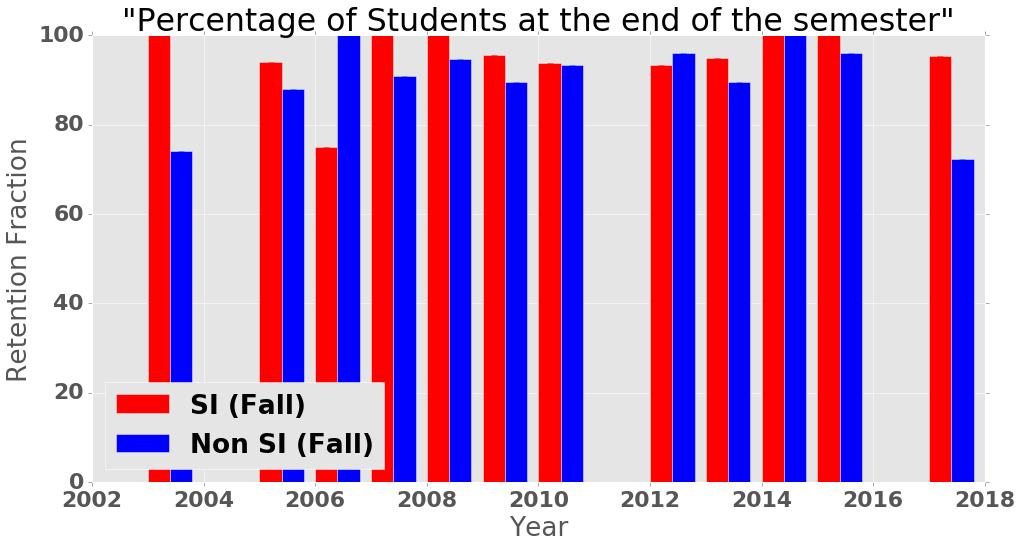

In [114]:
fig, ax = plt.subplots()

barsif = ax.bar(xsif, survival_frac_si_fall*100, width*2, color='r', yerr=0.0, label= "SI (Fall)")
barnonsif = ax.bar(xnonsif+0.2, survival_frac_nosi_fall*100, width*2, color='b', yerr=0.0 , label= "Non SI (Fall)")
#barsis = ax.bar(xsis, survival_frac_si_spring, width, color='m', yerr=0.0, label= "SI (Spring)")
#barnonsis = ax.bar(xnonsis, survival_frac_nosi_spring, width, color='c', yerr=0.0, label= "Non SI (Spring)")

ax.set_ylabel('Retention Fraction')
ax.set_xlabel('Year')
ax.set_title('"Percentage of Students at the end of the semester"')
ax.legend(loc='best')
fig.show()

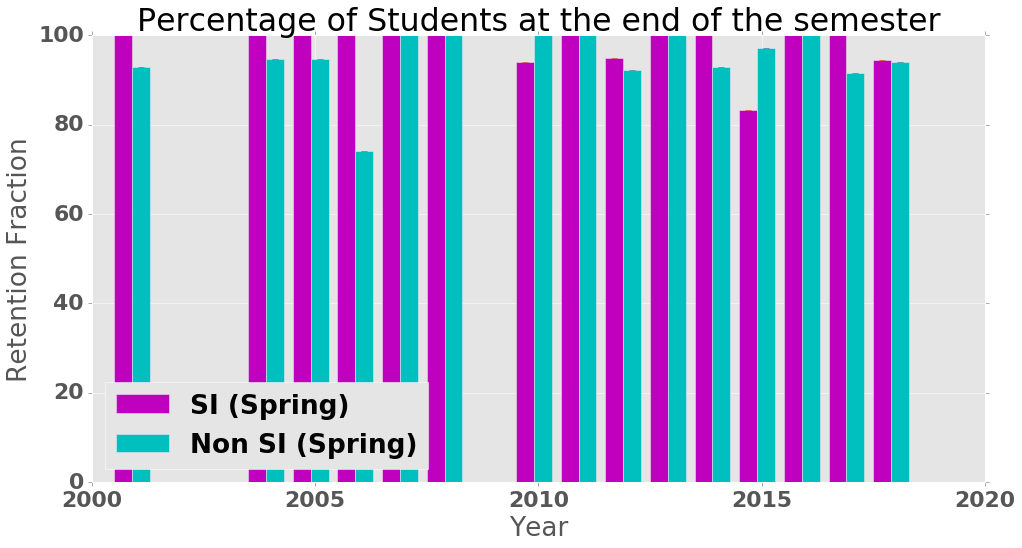

In [115]:
fig, ax = plt.subplots()

#barsif = ax.bar(xsif, survival_frac_si_fall, width*2, color='r', yerr=0.0, label= "SI (Fall)")
#barnonsif = ax.bar(xnonsif+0.2, survival_frac_nosi_fall, width*2, color='b', yerr=0.0 , label= "Non SI (Fall)")
barsis = ax.bar(xsis, survival_frac_si_spring*100, width*2, color='m', yerr=0.0, label= "SI (Spring)")
barnonsis = ax.bar(xnonsis+0.2, survival_frac_nosi_spring*100, width*2, color='c', yerr=0.0, label= "Non SI (Spring)")

ax.set_ylabel('Retention Fraction')
ax.set_xlabel('Year')
ax.set_title("Percentage of Students at the end of the semester")
ax.legend(loc='best')
fig.show()

## Now let's look at combined survival rate of SI and NonSI 

In [116]:
n_fall = (n_si_fall+n_nosi_fall)
n_spring = (n_si_spring+n_nosi_spring)
combined_wi_in_fall = (data_fall.iloc[:,5]+data_fall.iloc[:,15])
combined_wi_in_spring = (data_spring.iloc[:,5]+data_spring.iloc[:,15])
combined_survival_fraction_fall = (n_fall - combined_wi_in_fall)/n_fall
combined_survival_fraction_spring = (n_spring - combined_wi_in_spring)/n_spring
phat_fall = combined_survival_fraction_fall
phat_spring = combined_survival_fraction_spring
p1hat_fall = survival_frac_si_fall
p1hat_spring = survival_frac_si_spring
p2hat_fall = survival_frac_nosi_fall
p2hat_spring = survival_frac_nosi_spring


## Z-Values for fall and spring

In [117]:
Z_fall = (p1hat_fall-p2hat_fall)/(np.sqrt((phat_fall*(1-phat_fall))*(1.0/n_si_fall + 1.0/n_nosi_fall))) 
Z_spring = (p1hat_spring-p2hat_spring)/(np.sqrt((phat_spring*(1-phat_spring))*(1.0/n_si_spring + 1.0/n_nosi_spring))) 

In [118]:

import scipy.special as scsp
def z2p(z):
    """From z-score return p-value."""
    return 0.5 * (1 + scsp.erf(z / np.sqrt(2)))

In [119]:
p_fall = z2p(Z_fall)
p_spring = z2p(Z_spring)

In [120]:
print p_fall

1     0.981785
4     0.746319
6     0.002720
8     0.826052
10    0.808315
11    0.780489
13    0.521720
16    0.320075
18    0.749080
20         NaN
22    0.786395
25    0.979680
dtype: float64
